In [4]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
test_data.shape

(102, 13)

In [5]:
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [6]:
import tensorflow as tf

In [3]:
def build_model():
    model = tf.keras.models.Sequential([tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(64,activation='relu'),
            tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse', metrics=['mean_absolute_error'])
    return model

In [48]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []



In [49]:
for i in 


SyntaxError: invalid syntax (770335750.py, line 1)

In [50]:
a

array([1, 2, 3])

In [51]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (1+i) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]],
        axis = 0

    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis = 0)

    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [26]:
from keras import models

In [53]:
all_scores

[1.8155134916305542, 2.530200719833374, 2.7812485694885254, 2.588210105895996]

In [54]:
np.mean(all_scores)

2.4287932217121124

In [73]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples : (1+i) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate([
        train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]],
        axis = 0

    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i + 1) * num_val_samples:]],
        axis = 0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size = 1, verbose = 0,validation_data = (val_data, val_targets))
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [75]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [76]:
import matplotlib.pyplot as plt

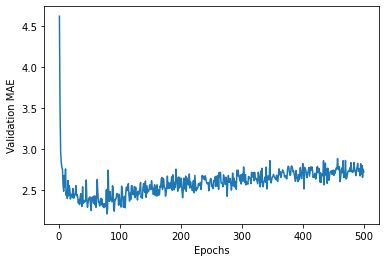

In [77]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [87]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

Text(0, 0.5, 'Validation MAE')

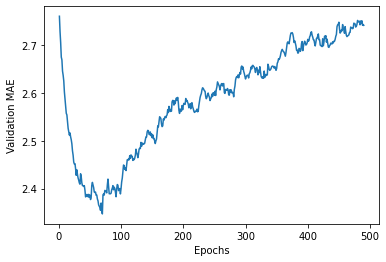

In [88]:
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.xticks()


In [1]:
smooth_mae_history

NameError: name 'smooth_mae_history' is not defined

In [7]:



model = build_model()
model.fit(train_data,train_targets,
epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)


4/4 [==============================] - 0s 997us/step - loss: 17.8775 - mean_absolute_error: 2.6393
